**Name of data set:** College Basketball Dataset

**Source:** Kaggle

**The URL:** https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?select=cbb.csv

**License:** The data of such public sport websites portals are usually available to the public.

**Size of data set:**

**File Size:** The data set is about 118 MB (124,206,054 bytes).

**Number of items (rows):** There are 539266 items in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import json
import re
import random
from functools import reduce
from ast import literal_eval

In [ ]:
df = pd.read_csv('/content/cbb.csv')
df[:100]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Massachusetts,A10,33,13,106.4,109.6,0.4157,52.5,51.5,18.6,...,33.2,47.9,51.2,40.0,34.7,67.6,-12.8,NaN,NaN,2018
96,Richmond,A10,32,12,107.1,108.0,0.4755,52.1,55.4,16.9,...,31.4,53.2,55.3,33.4,37.2,69.1,-11.4,NaN,NaN,2018
97,Saint Joseph's,A10,32,16,104.5,99.9,0.6280,48.8,49.6,13.9,...,24.6,47.7,48.9,33.7,33.7,71.6,-8.1,NaN,NaN,2018
98,Saint Louis,A10,32,17,101.3,99.3,0.5572,47.1,49.3,19.5,...,35.1,46.6,47.7,32.0,34.8,65.3,-7.9,NaN,NaN,2018


In [ ]:
df['Win_Ratio'] = df['W'] / df['G']
metrics = ['EFG_O', 'EFG_D', 'TOR', 'ORB']

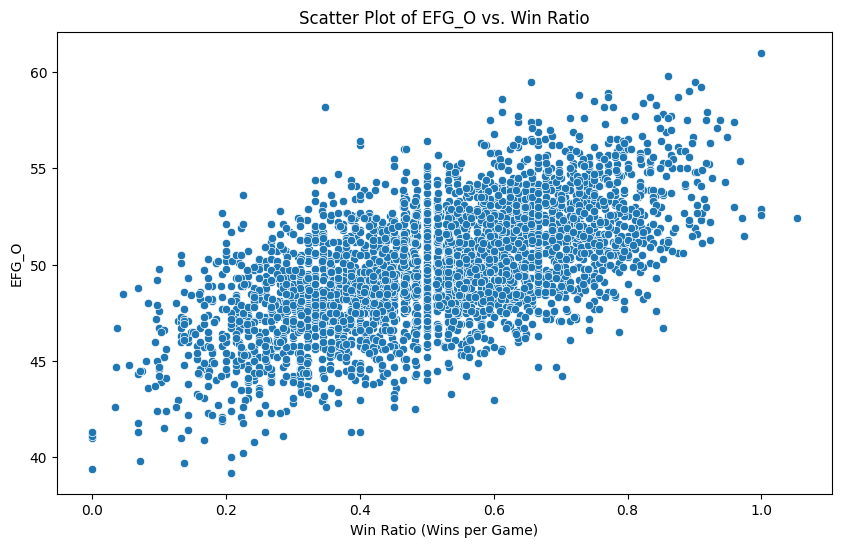

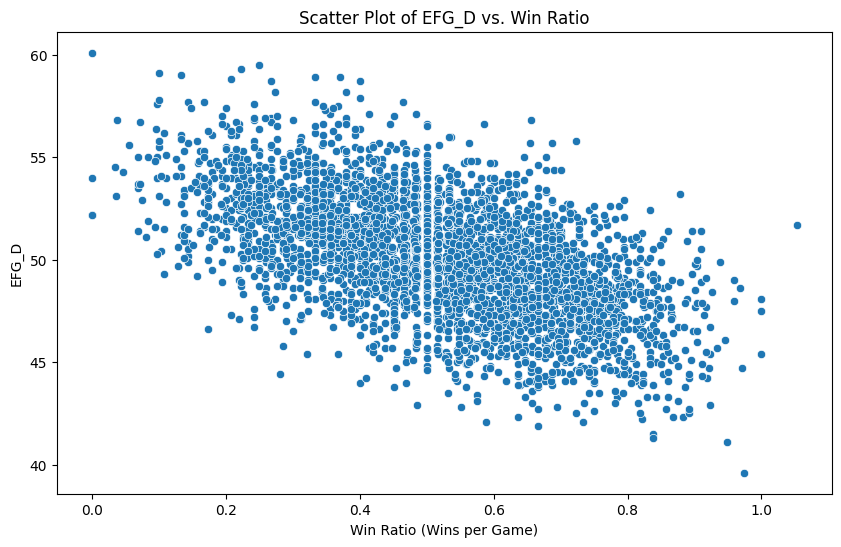

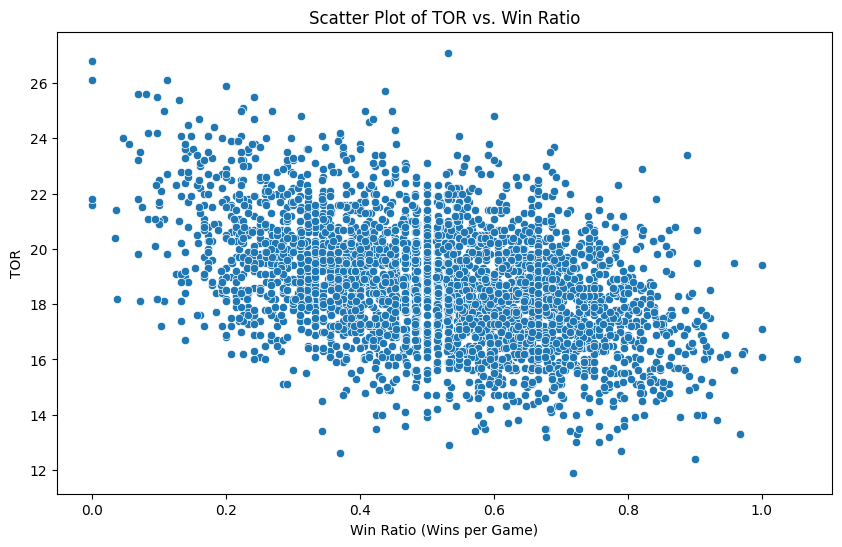

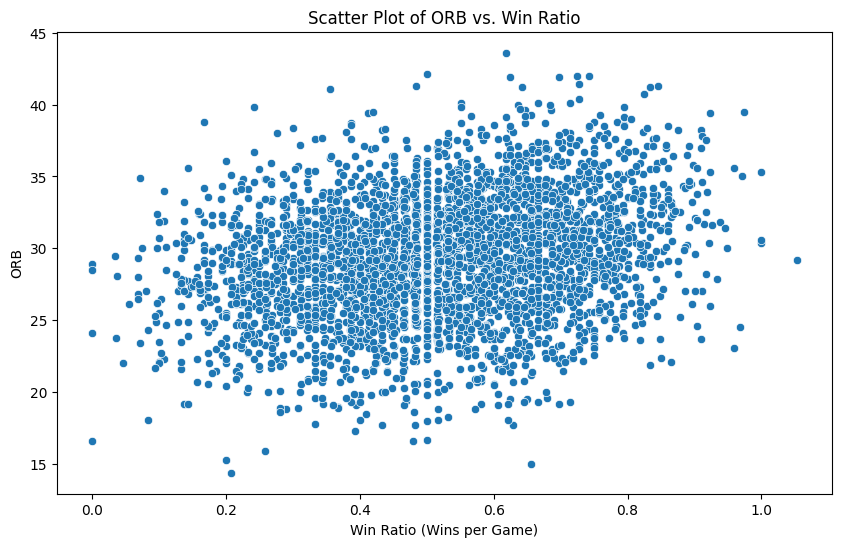

In [ ]:
#Chart 1： Scatter Plot with Win Ratio
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Win_Ratio', y=metric)
    plt.title(f'Scatter Plot of {metric} vs. Win Ratio')
    plt.xlabel('Win Ratio (Wins per Game)')
    plt.ylabel(metric)
    plt.show()

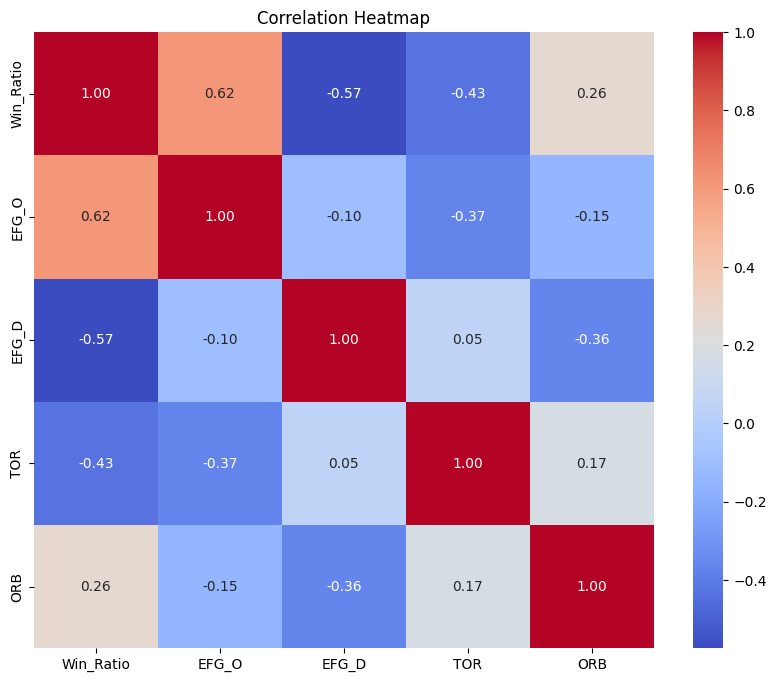

In [ ]:
#Chart 2：heatmap for correlation
correlation_matrix = df[['Win_Ratio'] + metrics].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-8-069d76a3c2cb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=metric, label=metric, shade=True)
<ipython-input-8-069d76a3c2cb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=metric, label=metric, shade=True)
<ipython-input-8-069d76a3c2cb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=metric, label=metric, shade=True)
<ipython-input-8-069d76a3c2cb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=metric, label=metric, shade=True)


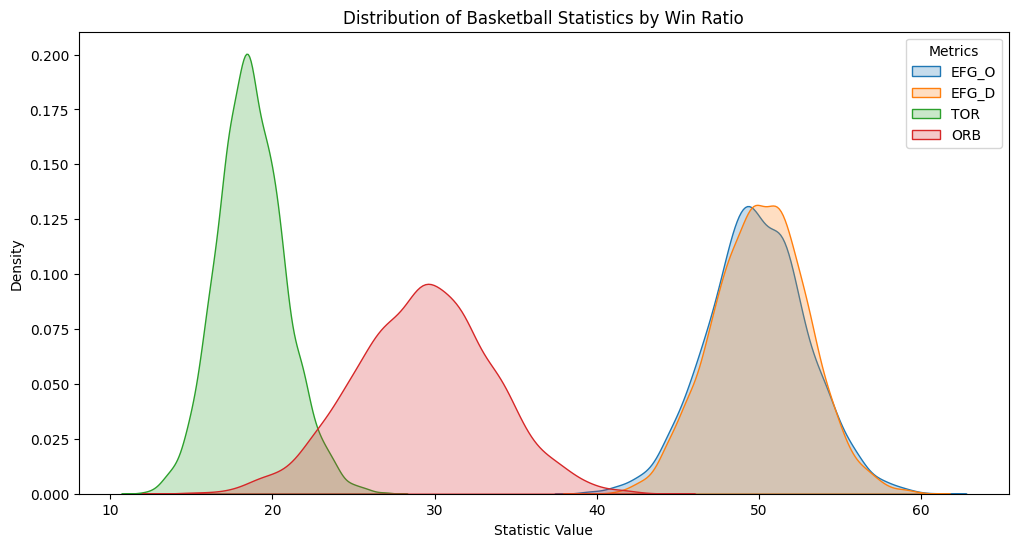

In [ ]:
#Chart 3：Distribution Line Plot
plt.figure(figsize=(12, 6))
for metric in metrics:
    sns.kdeplot(data=df, x=metric, label=metric, shade=True)

plt.title('Distribution of Basketball Statistics by Win Ratio')
plt.xlabel('Statistic Value')
plt.ylabel('Density')
plt.legend(title='Metrics')
plt.show()